In [254]:
import geopandas as gpd
import pandas as pd
import sys
import os
import rasterio as rio
from rasterio.plot import show
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from rasterstats import zonal_stats

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from rasterio.plot import plotting_extent
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data_dir = os.path.join(os.path.expanduser("~"), "data", "serbia")
out_dir = os.path.join(data_dir, "output")
wsf_dir = os.path.join(data_dir, 'wsf')

In [6]:
urban_extents = gpd.read_file(os.path.join(out_dir, "urban_extents_sele.shp"))

In [139]:
ids = [522, 502, 573, 549, 579, 477, 558, 499, 518, 582]

In [4]:
wsf = rio.open(os.path.join(wsf_dir, "Serbia_WSFevolution_30m.tif"))

In [79]:
wsf_data = wsf.read(1)

In [80]:
belgrade = urban_extents.iloc[[45]]

In [81]:
belgrade_shp = belgrade.geometry.iloc[0]

In [100]:
wsf_bel, out_transform = rio.mask.mask(wsf, [belgrade_shp], crop=True)

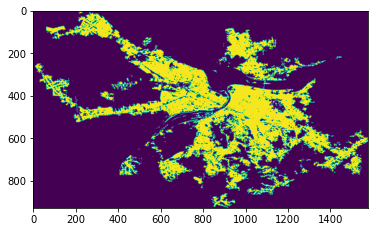

<AxesSubplot:>

In [101]:
show(wsf_bel)

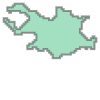

In [45]:
belgrade_shp

In [102]:
wsf_bel.shape

(1, 929, 1578)

In [103]:
wsf_bel_data = wsf_bel[0,:,:]

In [104]:
wsf_bel_data.shape

(929, 1578)

<AxesSubplot:>

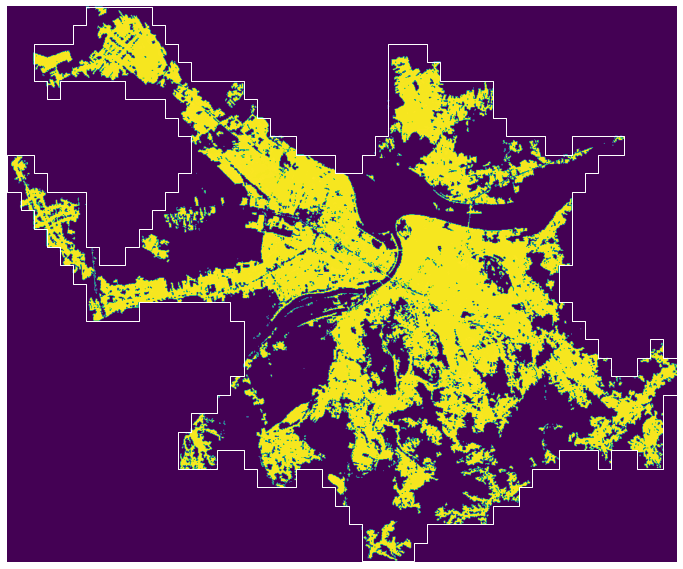

In [105]:
figsize = (12,12)
fig, ax = plt.subplots(1, 1,  figsize = figsize)
# ax.set_title("Travel Time to Nearest City", fontsize=14)

plt.axis('off')
ext = plotting_extent(wsf_bel_data, out_transform)

# show(out_image)
im = ax.imshow(wsf_bel_data, extent=ext)

belgrade.plot(ax=ax, facecolor='none', edgecolor='white', markersize=50, alpha=1)

# urban_extents.plot(ax=ax, facecolor='black', edgecolor='white', markersize=50, alpha=1)
# inB.plot(ax=ax, facecolor='none', edgecolor='lightgrey')

# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size="4%", pad=0.1)
# cb = fig.colorbar(im, cax=cax, orientation='vertical')

# plt.savefig(os.path.join(output_path, "Map of Travel Time.png"), dpi=300, bbox_inches='tight', facecolor='white')

In [108]:
wsf_ma = np.ma.array(wsf_bel_data, mask=(wsf_bel_data==0))

In [118]:
plt.hist?

In [119]:
!conda list matplotlib

# packages in environment at /opt/anaconda3:
#
# Name                    Version                   Build  Channel
matplotlib                3.0.2            py37h5429711_0  


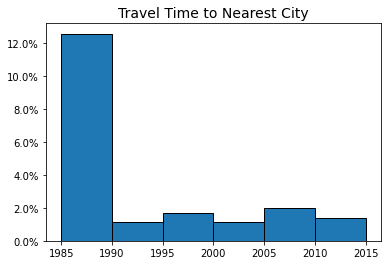

In [155]:
# figsize = (8,6)
fig, ax = plt.subplots(1, 1)
ax.set_title(f"Travel Time to Nearest City", fontsize=14)

plt.hist(wsf_ma[~np.isnan(wsf_ma)], bins=[1985, 1990, 1995, 2000, 2005, 2010, 2015],
        edgecolor='black', density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [424]:
wsf

<open DatasetReader name='/home/wb514197/data/serbia/wsf/Serbia_WSFevolution_30m.tif' mode='r'>

In [425]:
inD = wsf_data
unique, counts = np.unique(inD, return_counts=True)
res = pd.DataFrame(counts, unique, columns=["built"]).drop(0)
missingDates = [x for x in range(1985, 2015) if not x in res.index]
for x in missingDates:
    res.loc[x] = 0
res = res.sort_index()
res['cumBuilt'] = res['built'].cumsum()
res.cumBuilt.plot()

In [426]:
unique, counts = np.unique(inD, return_counts=True)

In [427]:
res = pd.DataFrame(counts, unique, columns=["built"]).drop(0)

In [428]:
missingDates = [x for x in range(1985, 2015) if not x in res.index]

In [429]:
missingDates

[1986]

In [430]:
for x in missingDates:
    res.loc[x] = 0
res = res.sort_index()

In [431]:
res['cumBuilt'] = res['built'].cumsum()

<AxesSubplot:>

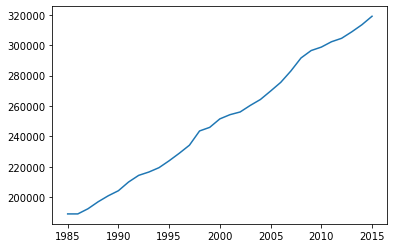

In [423]:
res.cumBuilt.plot()

In [ ]:
for i, urb_id in enumerate(ids):
#     urb = urban_extents.loc[urban_extents.ID==urb_id]
#     urb_shp = urb.geometry.iloc[0]
#     wsf_urb, out_transform = rio.mask.mask(wsf, [urb_shp], crop=True)
#     wsf_ma = np.ma.array(wsf_urb, mask=(wsf_urb==0))
    
#     urb_name = urb.city.iloc[0]
#     # figsize = (8,6)
#     fig, ax = plt.subplots(1, 1)
#     ax.set_title(f"{urb_name}", fontsize=14)

#     plt.hist(wsf_ma[~np.isnan(wsf_ma)], bins=[1985, 1990, 1995, 2000, 2005, 2010, 2015],
#             edgecolor='black', density=True)
#     plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

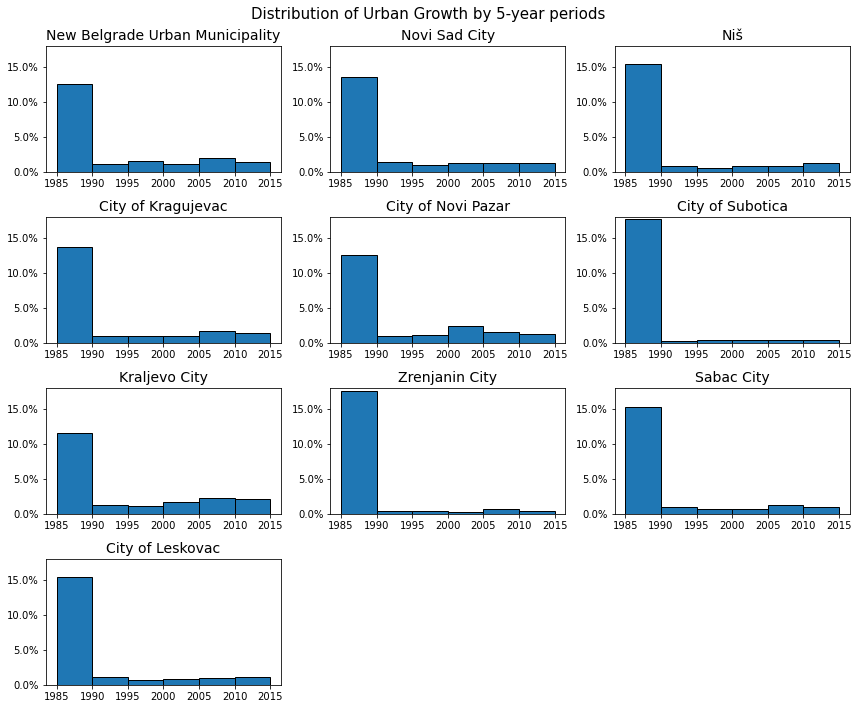

In [491]:
fig = plt.figure(figsize=(12, 10))

for i, urb_id in enumerate(ids):
    i = i+1
    urb = urban_extents.loc[urban_extents.ID==urb_id]
    urb_shp = urb.geometry.iloc[0]
    wsf_urb, out_transform = rio.mask.mask(wsf, [urb_shp], crop=True)
    wsf_ma = np.ma.array(wsf_urb, mask=(wsf_urb==0))
    
    urb_name = urb.city.iloc[0]
    # figsize = (8,6)
    ax = fig.add_subplot(4,3,i)
    ax.set_title(f"{urb_name}", fontsize=14)

    ax.hist(wsf_ma[~np.isnan(wsf_ma)], bins=[1985, 1990, 1995, 2000, 2005, 2010, 2015],
            edgecolor='black', density=True)
    ax.set_ylim(0, 0.18)
    fig.gca().yaxis.set_major_formatter(PercentFormatter(1))
#     ax.plot.gca().yaxis.set_major_formatter(PercentFormatter(1))

fig.suptitle('Distribution of Urban Growth by 5-year periods', fontsize=15)
plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(out_dir, "WSF Evolution Histogram2.png"), dpi=300, bbox_inches='tight', facecolor='white')

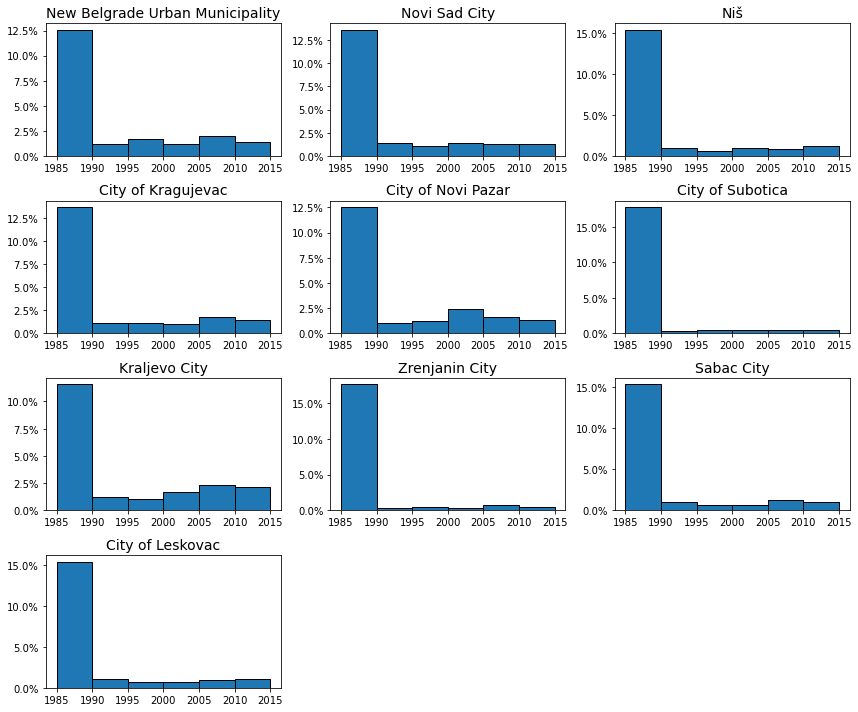

In [231]:
fig = plt.figure(figsize=(12, 10))

for i, urb_id in enumerate(ids):
    i = i+1
    urb = urban_extents.loc[urban_extents.ID==urb_id]
    urb_shp = urb.geometry.iloc[0]
    wsf_urb, out_transform = rio.mask.mask(wsf, [urb_shp], crop=True)
    wsf_ma = np.ma.array(wsf_urb, mask=(wsf_urb==0))
    
    urb_name = urb.city.iloc[0]
    # figsize = (8,6)
    ax = fig.add_subplot(4,3,i)
    ax.set_title(f"{urb_name}", fontsize=14)

    ax.hist(wsf_ma[~np.isnan(wsf_ma)], bins=[1985, 1990, 1995, 2000, 2005, 2010, 2015],
            edgecolor='black', density=True)
    fig.gca().yaxis.set_major_formatter(PercentFormatter(1))
#     ax.plot.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

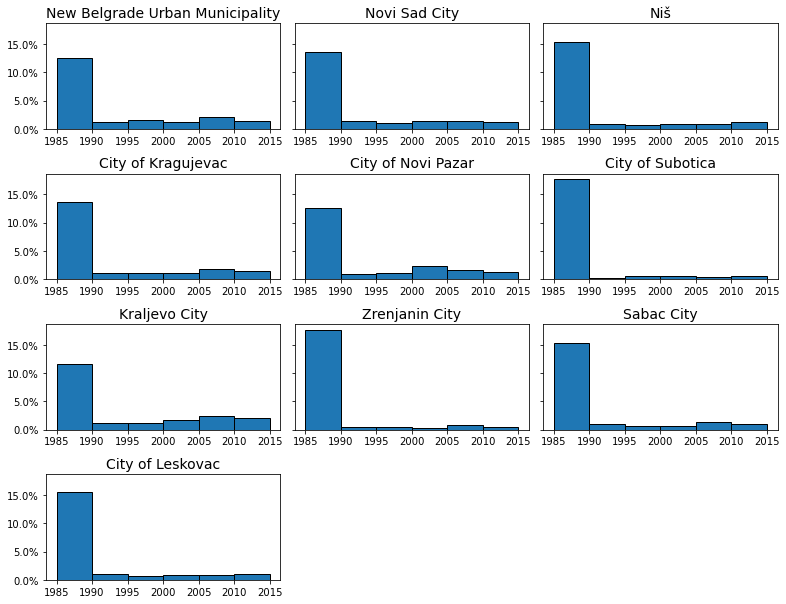

In [229]:
fig, axs = plt.subplots(4,3, figsize=(11, 8.5), facecolor='w', edgecolor='k', sharey=True)
axs = axs.ravel()

for i, urb_id in enumerate(ids):
    urb = urban_extents.loc[urban_extents.ID==urb_id]
    urb_shp = urb.geometry.iloc[0]
    wsf_urb, out_transform = rio.mask.mask(wsf, [urb_shp], crop=True)
    wsf_ma = np.ma.array(wsf_urb, mask=(wsf_urb==0))
    
    urb_name = urb.city.iloc[0]
    # figsize = (8,6)
#     fig, ax = plt.subplots(1, 1)
    axs[i].set_title(f"{urb_name}", fontsize=14)

    axs[i].hist(wsf_ma[~np.isnan(wsf_ma)], bins=[1985, 1990, 1995, 2000, 2005, 2010, 2015],
            edgecolor='black', density=True)
#     fig.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(out_dir, "WSF Evolution Histogram.png"), dpi=300, bbox_inches='tight', facecolor='white')

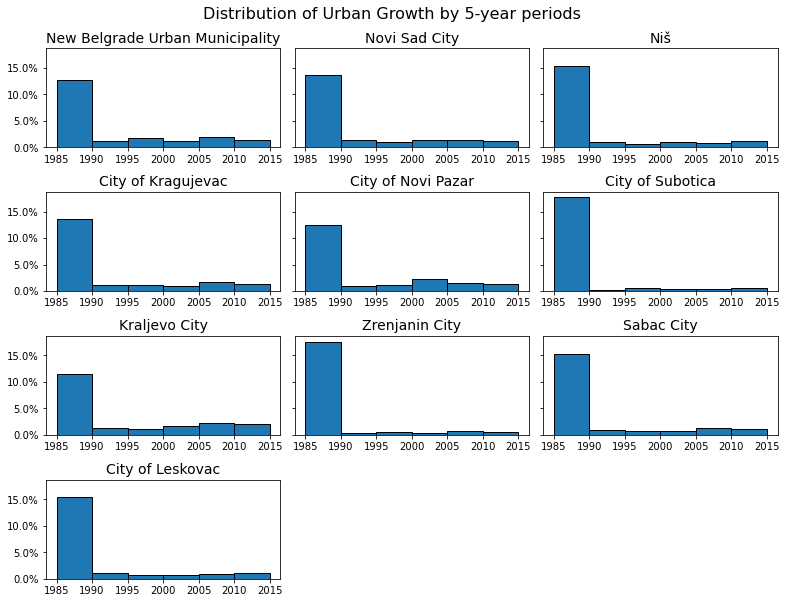

In [477]:
fig, axs = plt.subplots(4,3, figsize=(11, 8.5), facecolor='w', edgecolor='k', sharey=True)
axs = axs.ravel()

for i, urb_id in enumerate(ids):
    urb = urban_extents.loc[urban_extents.ID==urb_id]
    urb_shp = urb.geometry.iloc[0]
    wsf_urb, out_transform = rio.mask.mask(wsf, [urb_shp], crop=True)
    wsf_ma = np.ma.array(wsf_urb, mask=(wsf_urb==0))
    
    urb_name = urb.city.iloc[0]
    # figsize = (8,6)
#     fig, ax = plt.subplots(1, 1)
    axs[i].set_title(f"{urb_name}", fontsize=14)

    axs[i].hist(wsf_ma[~np.isnan(wsf_ma)], bins=[1985, 1990, 1995, 2000, 2005, 2010, 2015],
            edgecolor='black', density=True)
#     fig.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
fig.suptitle('Distribution of Urban Growth by 5-year periods', fontsize=15)
plt.tight_layout()
# plt.show()
# plt.savefig(os.path.join(out_dir, "WSF Evolution Histogram.png"), dpi=300, bbox_inches='tight', facecolor='white')

In [ ]:
inD = wsf_urb
unique, counts = np.unique(inD, return_counts=True)
res = pd.DataFrame(counts, unique, columns=["built"]).drop(0)
missingDates = [x for x in range(1985, 2015) if not x in res.index]
for x in missingDates:
    res.loc[x] = 0
res = res.sort_index()
res['cumBuilt'] = res['built'].cumsum()
res.cumBuilt.plot()

In [450]:
ids = [522, 502, 573, 549, 579, 477, 558, 499, 518, 582]

In [448]:
ids = [502, 573, 549, 579, 477, 558, 499, 518, 582]

In [506]:
res.cumBuilt

1985    17807
1986    17807
1987    17956
1988    18496
1989    19055
1990    19605
1991    19696
1992    19947
1993    20234
1994    20421
1995    20547
1996    20768
1997    20890
1998    21052
1999    21231
2000    21482
2001    21630
2002    21749
2003    22003
2004    22182
2005    22294
2006    22611
2007    22987
2008    23157
2009    23322
2010    23386
2011    23567
2012    23849
2013    24239
2014    24399
2015    24667
Name: cumBuilt, dtype: int64

<AxesSubplot:>

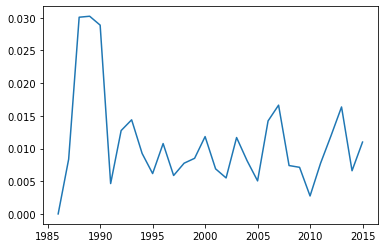

In [513]:
res.cumBuilt.pct_change().plot()

<AxesSubplot:>

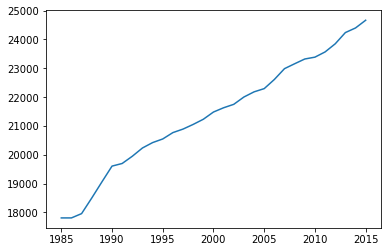

In [501]:
res.cumBuilt.plot()

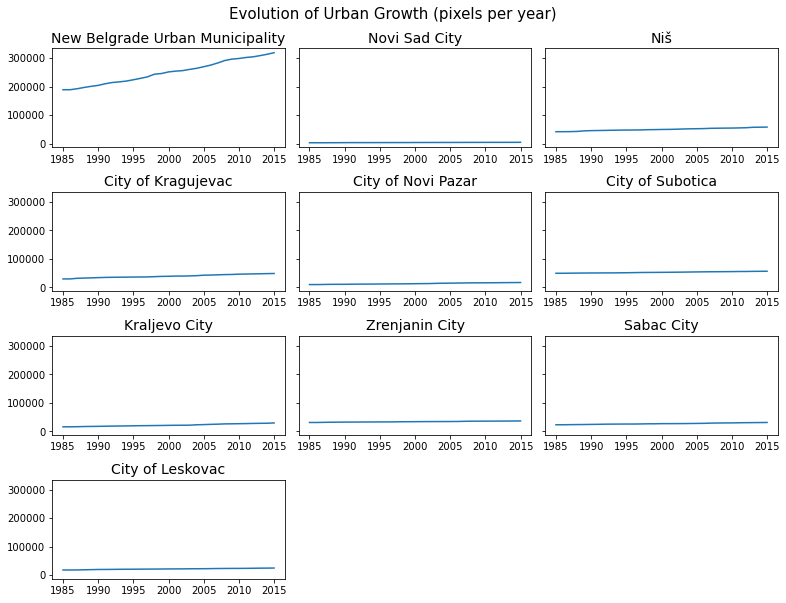

In [595]:
fig, axs = plt.subplots(4,3, figsize=(11, 8.5), facecolor='w', edgecolor='k', sharey=True)
axs = axs.ravel()

for i, urb_id in enumerate(ids):
    urb = urban_extents.loc[urban_extents.ID==urb_id]
    urb_shp = urb.geometry.iloc[0]
    wsf_urb, out_transform = rio.mask.mask(wsf, [urb_shp], crop=True)
    inD = wsf_urb
    unique, counts = np.unique(inD, return_counts=True)
    res = pd.DataFrame(counts, unique, columns=["built"]).drop(0)
    missingDates = [x for x in range(1985, 2015) if not x in res.index]
    for x in missingDates:
        res.loc[x] = 0
    res = res.sort_index()
    res['cumBuilt'] = res['built'].cumsum()
    
    urb_name = urb.city.iloc[0]
    # figsize = (8,6)
#     fig, ax = plt.subplots(1, 1)
    axs[i].set_title(f"{urb_name}", fontsize=14)
    
    res.cumBuilt.plot(ax=axs[i]) # .pct_change()
#     axs[i].hist(wsf_ma[~np.isnan(wsf_ma)], bins=[1985, 1990, 1995, 2000, 2005, 2010, 2015],
#             edgecolor='black', density=True)
#     fig.gca().yaxis.set_major_formatter(PercentFormatter(1))

fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
fig.suptitle('Evolution of Urban Growth (pixels per year)', fontsize=15)

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(out_dir, "WSF Evolution Line Plot Fixed.png"), dpi=300, bbox_inches='tight', facecolor='white')

In [199]:
# fig, axs = plt.subplots(4,3, figsize=(16, 16), facecolor='w', edgecolor='k')
# axs = axs.ravel()
# for i, urb_id in enumerate(ids):
#     urb = urban_extents.loc[urban_extents.ID==urb_id]
#     urb_shp = urb.geometry.iloc[0]
#     wsf_urb, out_transform = rio.mask.mask(wsf, [urb_shp], crop=True)
#     wsf_ma = np.ma.array(wsf_urb, mask=(wsf_urb==0))
    
#     urb_name = urb.city.iloc[0]
#     # figsize = (8,6)
# #     fig, ax = plt.subplots(1, 1)
#     axs[i].set_title(f"{urb_name}", fontsize=14)

#     plt.hist(wsf_ma[~np.isnan(wsf_ma)], bins=[1985, 1990, 1995, 2000, 2005, 2010, 2015],
#             edgecolor='black', density=True)
#     plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [526]:
wp_annual_dir = os.path.join(data_dir, "wp_annual")

In [527]:
wp_files = os.listdir(wp_annual_dir)

In [556]:
wp_files = glob.glob(wp_annual_dir+"/*_UNadj.tif")

In [561]:
wp_files.sort()

In [563]:
res = []
for wp_file in wp_files:
    wp = rio.open(wp_file)
    wp_data = wp.read(1)
    year = os.path.basename(wp_file)[8:12]
    zs_pop = pd.DataFrame(zonal_stats(urban_extents, wp_data, affine=wp.transform, nodata=-99999.0, stats='sum'))
    zs_pop.rename(columns={'sum':f'{year}'}, inplace=True)
    res.append(zs_pop)

In [564]:
res = pd.concat(res, axis=1)

In [544]:
urban_extents.sort_values('Pop', ascending=False)

,group,ID,Pop,city,county,state,geometry
45,45,522,1.503328e+06,New Belgrade Urban Municipality,City of Belgrade,Central Serbia,"POLYGON ((20.24875 44.92458, 20.29042 44.92458..."
27,27,504,4.131190e+05,Novi Sad City,South Backa Administrative District,Vojvodina,"POLYGON ((19.79875 45.31625, 19.84875 45.31625..."
96,96,573,2.864269e+05,Niš,Nisava Administrative District,Central Serbia,"POLYGON ((21.85708 43.35792, 21.89875 43.35792..."
72,72,549,1.876786e+05,City of Kragujevac,Sumadija Administrative District,Central Serbia,"POLYGON ((20.89875 44.05792, 20.92375 44.05792..."
102,102,579,1.181532e+05,City of Novi Pazar,Raska Administrative District,Central Serbia,"POLYGON ((20.52375 43.17458, 20.54042 43.17458..."
...,...,...,...,...,...,...,...
61,61,538,5.113682e+03,Lajkovac Municipality,Kolubara Administrative District,Central Serbia,"POLYGON ((20.15708 44.38292, 20.17375 44.38292..."
23,23,500,5.091845e+03,Novi Sad City,South Backa Administrative District,Vojvodina,"POLYGON ((19.72375 45.36625, 19.73208 45.36625..."
10,10,487,5.052223e+03,Becej Municipality,South Backa Administrative District,Vojvodina,"POLYGON ((20.06542 45.71625, 20.09042 45.71625..."
57,57,534,5.043695e+03,Mali Zvornik Municipality,Macva Administrative District,Central Serbia,"POLYGON ((19.10708 44.41625, 19.12375 44.41625..."


<AxesSubplot:>

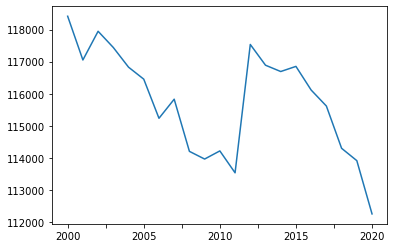

In [593]:
res.iloc[0].plot()

Text(0.5, 1.0, 'Change in Population - Belgrade')

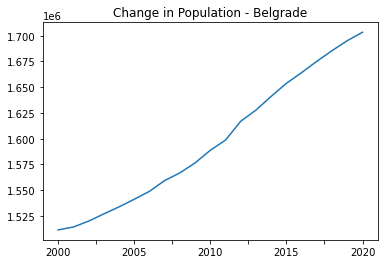

In [578]:
res.iloc[45].plot()
plt.title("Change in Population - Belgrade")

In [582]:
urb_pop_annual = urban_extents.join(res)

In [586]:
urb_pop_annual.columns!="geometry"

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [592]:
urb_pop_annual.loc[:, urb_pop_annual.columns!="geometry"].to_csv(os.path.join(out_dir, "urb_ext_pop_annual.csv"))

In [299]:
res_total = []
for wp_file in wp_files:
    wp = rio.open(wp_file)
    wp_data = wp.read(1)
    wp_data_ma = np.ma.array(wp_data, mask=(wp_data==-99999.))
    wp_sum = wp_data_ma.sum()
    res_total.append(wp_sum)

In [310]:
res_total = pd.DataFrame(res_total, index=range(2000, 2021, 1)).transpose()

<AxesSubplot:>

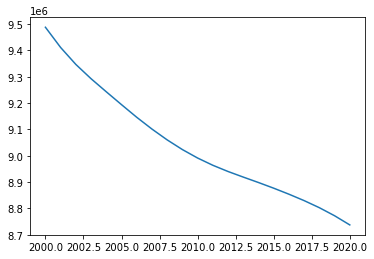

In [312]:
res_total.iloc[0].plot()

In [549]:
adm2_path = os.path.join(data_dir, 'admin', 'gadm36_SRB_2.shp')
adm2 = gpd.read_file(adm2_path)

In [550]:
res_adm2 = []
for wp_file in wp_files:
    wp = rio.open(wp_file)
    wp_data = wp.read(1)
    year = os.path.basename(wp_file)[8:12]
    zs_pop = pd.DataFrame(zonal_stats(adm2, wp_data, affine=wp.transform, nodata=-99999.0, stats='sum'))
    zs_pop.rename(columns={'sum':f'{year}'}, inplace=True)
    res_adm2.append(zs_pop)

In [551]:
res_adm2 = pd.concat(res_adm2, axis=1)
res_adm2_join = adm2.join(res_adm2)

In [553]:
res_adm2_join.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry', '2000', '2005', '2010', '2015', '2020', '2002', '2011',
       '2001', '2003', '2004', '2006', '2007', '2008', '2009', '2012', '2013',
       '2014', '2016', '2017', '2018', '2019'],
      dtype='object')

In [552]:
res_adm2_join.sort_values('2019', ascending=False)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,2007,2008,2009,2012,2013,2014,2016,2017,2018,2019
0,SRB,Serbia,SRB.1_1,Borski,Борски,SRB.1.1_1,Bor,None,Бор,Opštine,...,65915.345517,64799.604973,63554.134153,60748.325722,59929.596342,59138.538870,57350.039226,56506.793514,55574.434670,54709.425984
1,SRB,Serbia,SRB.1_1,Borski,Борски,SRB.1.2_1,Kladovo,Claudia|Kladowo,Кладово,Opštine,...,28149.764627,27765.159714,27293.099267,26106.844397,25714.276111,25370.462649,24618.683781,24247.302914,23887.992638,23507.927678
2,SRB,Serbia,SRB.1_1,Borski,Борски,SRB.1.3_1,Majdanpek,None,Мајданпек,Opštine,...,25972.195662,25286.256108,24865.546566,23274.343389,22599.935501,22133.445007,21046.589153,20494.151771,19980.364624,19542.991757
3,SRB,Serbia,SRB.1_1,Borski,Борски,SRB.1.4_1,Negotin,None,Неготин,Opštine,...,50348.141795,49408.797424,48559.366989,46115.487104,45412.289893,44662.155540,43179.613661,42448.619947,41678.127162,40926.787324
4,SRB,Serbia,SRB.2_1,Braničevski,Браничевски,SRB.2.1_1,Golubac,Galambóc|Golumbácz|Güvercinlik,Голубац,Opštine,...,12741.762676,12537.212335,12207.135524,11540.309812,11277.642532,11066.085930,10629.761471,10420.215033,10198.149477,9988.884520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,SRB,Serbia,SRB.25_1,Zlatiborski,Златиборски,SRB.25.6_1,Požega,None,Пожега,Opštine,...,44967.075000,44704.090119,44237.345874,43119.496477,42920.251181,42387.108672,41607.639648,41240.097421,40927.114176,40420.152831
157,SRB,Serbia,SRB.25_1,Zlatiborski,Златиборски,SRB.25.7_1,Priboj,None,Прибој,Opštine,...,34531.434230,34034.378122,33484.804943,32517.811897,32174.317316,31871.096625,30836.325462,30452.610688,30035.849596,29638.983263
158,SRB,Serbia,SRB.25_1,Zlatiborski,Златиборски,SRB.25.8_1,Prijepolje,None,Пријепоље,Opštine,...,47854.127170,47237.273299,46680.544293,45096.479740,44608.862755,44119.618493,43094.512088,42592.806047,42093.925556,41565.092215
159,SRB,Serbia,SRB.25_1,Zlatiborski,Златиборски,SRB.25.9_1,Sjenica,None,Сјеница,Opštine,...,32665.394313,32401.260218,32218.868500,31670.896027,31466.815312,31260.979979,30811.560226,30607.382577,30422.955786,30203.785573


<AxesSubplot:>

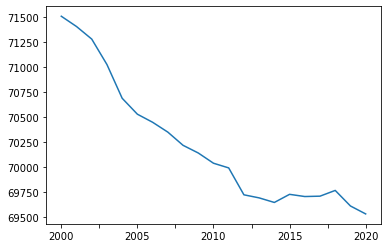

In [326]:
res_adm2.iloc[15].plot()

In [350]:
cols = res_adm2_join.columns

In [359]:
res_adm2_join.loc[:, cols != 'geometry'].to_csv(os.path.join(out_dir, "adm2_pop.csv"))

In [360]:
adm2_path = os.path.join(data_dir, 'admin', 'Op_tina_copy.shp')
adm2 = gpd.read_file(adm2_path)

In [363]:
adm2 = adm2.to_crs('EPSG:4326')

In [365]:
res_adm2 = []
for wp_file in wp_files:
    wp = rio.open(wp_file)
    wp_data = wp.read(1)
    year = os.path.basename(wp_file)[8:12]
    zs_pop = pd.DataFrame(zonal_stats(adm2, wp_data, affine=wp.transform, nodata=-99999.0, stats='sum'))
    zs_pop.rename(columns={'sum':f'{year}'}, inplace=True)
    res_adm2.append(zs_pop)

In [366]:
res_adm2 = pd.concat(res_adm2, axis=1)
res_adm2_join = adm2.join(res_adm2)

In [374]:
res_adm2_join.loc[:,"pop_delta_20_00"] = res_adm2_join["2020"]-res_adm2_join["2000"]

In [378]:
res_adm2_join.loc[:,"pop_pch_20_00"] = (res_adm2_join["2020"]-res_adm2_join["2000"]) / res_adm2_join["2000"]

In [384]:
res_adm2_join.geometry.representative_point()

0      POINT (22.39749 42.46165)
1      POINT (19.97792 46.05236)
2      POINT (22.55353 44.56866)
3      POINT (20.18930 45.24644)
4      POINT (19.95641 45.63155)
                 ...            
163    POINT (21.99928 43.37512)
164    POINT (21.84295 43.39975)
165    POINT (21.91411 42.59851)
166    POINT (22.10443 42.53123)
167    POINT (19.70533 43.70885)
Length: 168, dtype: geometry

In [387]:
res_adm2_join.loc[:,"cent"] = res_adm2_join.geometry.representative_point()

In [392]:
res_adm2_join.loc[:, ["opstina_ma", "cent", "pop_delta_20_00", "pop_pch_20_00"]].to_csv(os.path.join(out_dir, "opstina_pop.csv"))

In [397]:
res_adm2_join.rename(columns={'2020':'pop2020'}, inplace=True)

In [401]:
res_adm2_join.loc[:, ["opstina_ma", "cent", 'pop2020', "pop_delta_20_00", "pop_pch_20_00"]].to_csv(os.path.join(out_dir, "opstina_pop3.csv"))

In [402]:
len(res_adm2_join)

168